<br/><br/>
<a id='Header' style="font-size:40px; color:#1D2951; text-decoration:none; text-align:center;">
    <center><b>An Overview and Analysis of<br/><br/>"NICS Firearm  Background Checks"</b></center>
</a>

<br/><br/>

<a id='Header' style="font-size:30px; color:#1D2951; text-decoration:none">
    <b> Table of Contents </b>
</a> 
<ul>
<li><a href="#intro" style="font-size:15px; color:#1D2951">Introduction</a></li>
<li><a href="#wrangling" style="font-size:15px; color:#1D2951">Data Wrangling</a></li>
<li><a href="#eda" style="font-size:15px; color:#1D2951">Exploratory Data Analysis</a></li>
<li><a href="#conclusions" style="font-size:15px; color:#1D2951">Conclusions</a></li>
</ul>

<hr>

<a id='intro' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Introduction</b></a>

<p style="font-size:17px"> In U.S., buying firearms requires a procedure of background checks for any criminal history for the applicant, or specific diseases that could make him ineligible for acquiring a weapon.<br/>
The FBI made these NICS firearm background checks available for puplic analysis.<br/>
</p>

> NICS**—** stands for National Instant Criminal Background Check System

<p style="font-size:20px"><b>Here in this analysis we'll get an overview of the dataset and try to see:</b></p>
<p style="font-size:17px">
<a href='#1'> 1.</a> when did the most background checks ever happend in the history of U.S. and investigate more to see what led to it.<br/>
<a href='#2'> 2.</a> Then investigate the overall background checks from 1998 to 2020 and point to some interesting events that lead to peak purchases of the firearms<br/>
<a href='#3'> 3.</a> Which state with the most accumlative background-check records?<br/>
<a href='#4'> 4.</a> Which state with the most growth background check records?<br/>
<a href='#5'> 5.</a> What is the relation between the handguns and the long-guns(Rifles and shotguns), and when did the sudden decrease in long-gungs happen? 
</p>

In [1]:
# libraries used and additional useful class for debugging
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
%matplotlib inline

In [2]:
class Color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

<hr>
<br/>
<a id='wrangling' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Data Wrangling</b></a>

<p style="font-size:17px">Here we will see an overview and some intuitions about data, then rename some columns with more informative names and perform some cleanings for missing values and etc.</p>

In [3]:
df = pd.read_csv('nics-firearm-background-checks.csv')
df.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-09,Alabama,33228.0,642.0,23455.0,17369.0,1633.0,981,0.0,35.0,...,0.0,0.0,0.0,30.0,19.0,8.0,1.0,2.0,0.0,80478
1,2020-09,Alaska,388.0,2.0,3275.0,3333.0,345.0,201,0.0,1.0,...,0.0,0.0,0.0,8.0,16.0,2.0,1.0,1.0,0.0,7897
2,2020-09,Arizona,8786.0,1198.0,23996.0,12094.0,1963.0,1873,0.0,16.0,...,0.0,0.0,0.0,39.0,13.0,5.0,0.0,0.0,0.0,51287
3,2020-09,Arkansas,3686.0,554.0,9214.0,8003.0,505.0,383,10.0,8.0,...,0.0,0.0,0.0,3.0,12.0,3.0,0.0,0.0,0.0,24043
4,2020-09,California,32998.0,0.0,61258.0,36638.0,7815.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139313


<p style="font-size:17px"><b>Columns meanings - from the puplic NCIS Firearm Background checks PDF resource</b></p>

> https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view

**• Handgun—**(a) any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled.

**• Long Gun—** a weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore either
a number of ball shot or a single projectile for each single pull of the trigger.

**• Other—** refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.
_________________________________________________________________________

**• Pre-Pawn—background** checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.

**• Redemption—background** checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.

**• Returned/Disposition—background** checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited.

**• Rentals—background** checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.

**• Private Sale—background** checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

**• Return to Seller-Private Sale—background** checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.
_________________________________________________________________________


<p style="font-size:17px; color:#1D2951"> <b>We will be focusing on these specific columns ['month', 'state', 'permit', 'handgun', 'long_gun', 'other', 'totals']</b></p>

<p style="font-size:18px ; color:#1D2951"> <b>• Clean columns datatypes</b> </p>

<p style="font-size:17px">Before checking datatypes, first let's change 'month' column name to a more convenient one like 'date'</p>

In [4]:
df.rename(columns={'month':'date'}, inplace=True)
df.head(1)

,date,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-09,Alabama,33228.0,642.0,23455.0,17369.0,1633.0,981,0.0,35.0,...,0.0,0.0,0.0,30.0,19.0,8.0,1.0,2.0,0.0,80478


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14465 entries, 0 to 14464
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       14465 non-null  object 
 1   state                      14465 non-null  object 
 2   permit                     14441 non-null  float64
 3   permit_recheck             3080 non-null   float64
 4   handgun                    14445 non-null  float64
 5   long_gun                   14446 non-null  float64
 6   other                      7480 non-null   float64
 7   multiple                   14465 non-null  int64  
 8   admin                      14442 non-null  float64
 9   prepawn_handgun            12522 non-null  float64
 10  prepawn_long_gun           12520 non-null  float64
 11  prepawn_other              7095 non-null   float64
 12  redemption_handgun         12525 non-null  float64
 13  redemption_long_gun        12524 non-null  flo

<p style="font-size:17px">
'date' column would be more useful if we changed it from object type to 'datetime' type<br/>
And since it is a time series column we could use it as an index for easier manipulation<br/><br/>
The rest of the 'float64' columns don't have to be floats as the are count numbers (integers)<br/>
But we'll leave it as it is and convert the ones needed only when analyzing the data.
</p>

In [6]:
# NO NEED FOR FLOATS CONVERSION RIGHTNOW
# for col_name in df.select_dtypes(include='float64'):
#     df[col_name] = df[col_name].astype('Int64')

df['date'] = pd.to_datetime(df['date'], format='%Y-%m')
df.head(1)

,date,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-09-01,Alabama,33228.0,642.0,23455.0,17369.0,1633.0,981,0.0,35.0,...,0.0,0.0,0.0,30.0,19.0,8.0,1.0,2.0,0.0,80478


In [7]:
df['date'].dtype # datetime type

dtype('<M8[ns]')

<p style="font-size:18px ; color:#1D2951"> <b>• Clean missing values</b> </p>
<p style="font-size:17px">
we can't just use the mean value of the whole column to fill the missing values as the values differ BASED ON the events happening, so it strongly correlates with the datetime!<br/>
so we have to fill the missing values with the mean of the entries of its own month.
</p>

In [8]:
# fillna of [permit, handgun, long_gun, other] column

# df[['permit', 'handgun', 'long_gun', 'other']] = df.groupby('date')[['permit', 'handgun', 'long_gun', 'other']].apply(lambda x: x.fillna(x.mean()))
# gives error : ValueError: cannot handle a non-unique multi-index!, idk why - check

fill_cols = ['permit', 'handgun', 'long_gun', 'other']

for col_name in fill_cols:
    df[col_name] = df.groupby('date')[col_name].apply(lambda x: x.fillna(x.mean()))

df[fill_cols].isnull().sum()

permit         0
handgun        0
long_gun       0
other       6985
dtype: int64

<p style="font-size:17px">
'other' Column seems to need more cleaning, but now that we used the mean of each month entries we can just fill the other missing months with just zeros<br/>
</p>

In [9]:
df['other'] = df['other'].fillna(0)
df[fill_cols].isnull().sum()

permit      0
handgun     0
long_gun    0
other       0
dtype: int64

<p style="font-size:17px; color:#1D2951">
    Now all columns we will be using are perfectly cleaned!
</p>

<p style="font-size:17px; color:#1D2951"> 
    <b>• Discard unused columns</b>
</p>

In [10]:
useful_cols = ['date', 'state', 'permit', 'handgun', 'long_gun', 'other', 'totals']
df = df[useful_cols]
df.head(3)

,date,state,permit,handgun,long_gun,other,totals
0,2020-09-01,Alabama,33228.0,23455.0,17369.0,1633.0,80478
1,2020-09-01,Alaska,388.0,3275.0,3333.0,345.0,7897
2,2020-09-01,Arizona,8786.0,23996.0,12094.0,1963.0,51287


<p style="font-size:17px">
Now it is easier for investiagtion
</p>

In [11]:
df.set_index('date', inplace=True)
df.sort_index()
df.head(3)

,state,permit,handgun,long_gun,other,totals
date,,,,,,
2020-09-01,Alabama,33228.0,23455.0,17369.0,1633.0,80478
2020-09-01,Alaska,388.0,3275.0,3333.0,345.0,7897
2020-09-01,Arizona,8786.0,23996.0,12094.0,1963.0,51287


<p style="font-size:17px"> 
Now all columns we will be using are perfectly clean, no need for cleaning the other columns
</p>

<hr>
<br/>
<a id='IDA' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Exploratory Data Analysis</b></a>

<p style="font-size:17px">
Now that all data we will be using is clean, let's plot the background checks for the past two decades along the time series. 
</p>


<p id='1' style="font-size:20px ; color:#1D2951"> <b>1. When did the most background checks ever happend in the history of U.S. and investigate more to see what led to it? </b>
</p>

<p style="font-size:17px">
    We will use the <b>'total'</b> column which corresponds to the total background checks
</p>

[None, None]

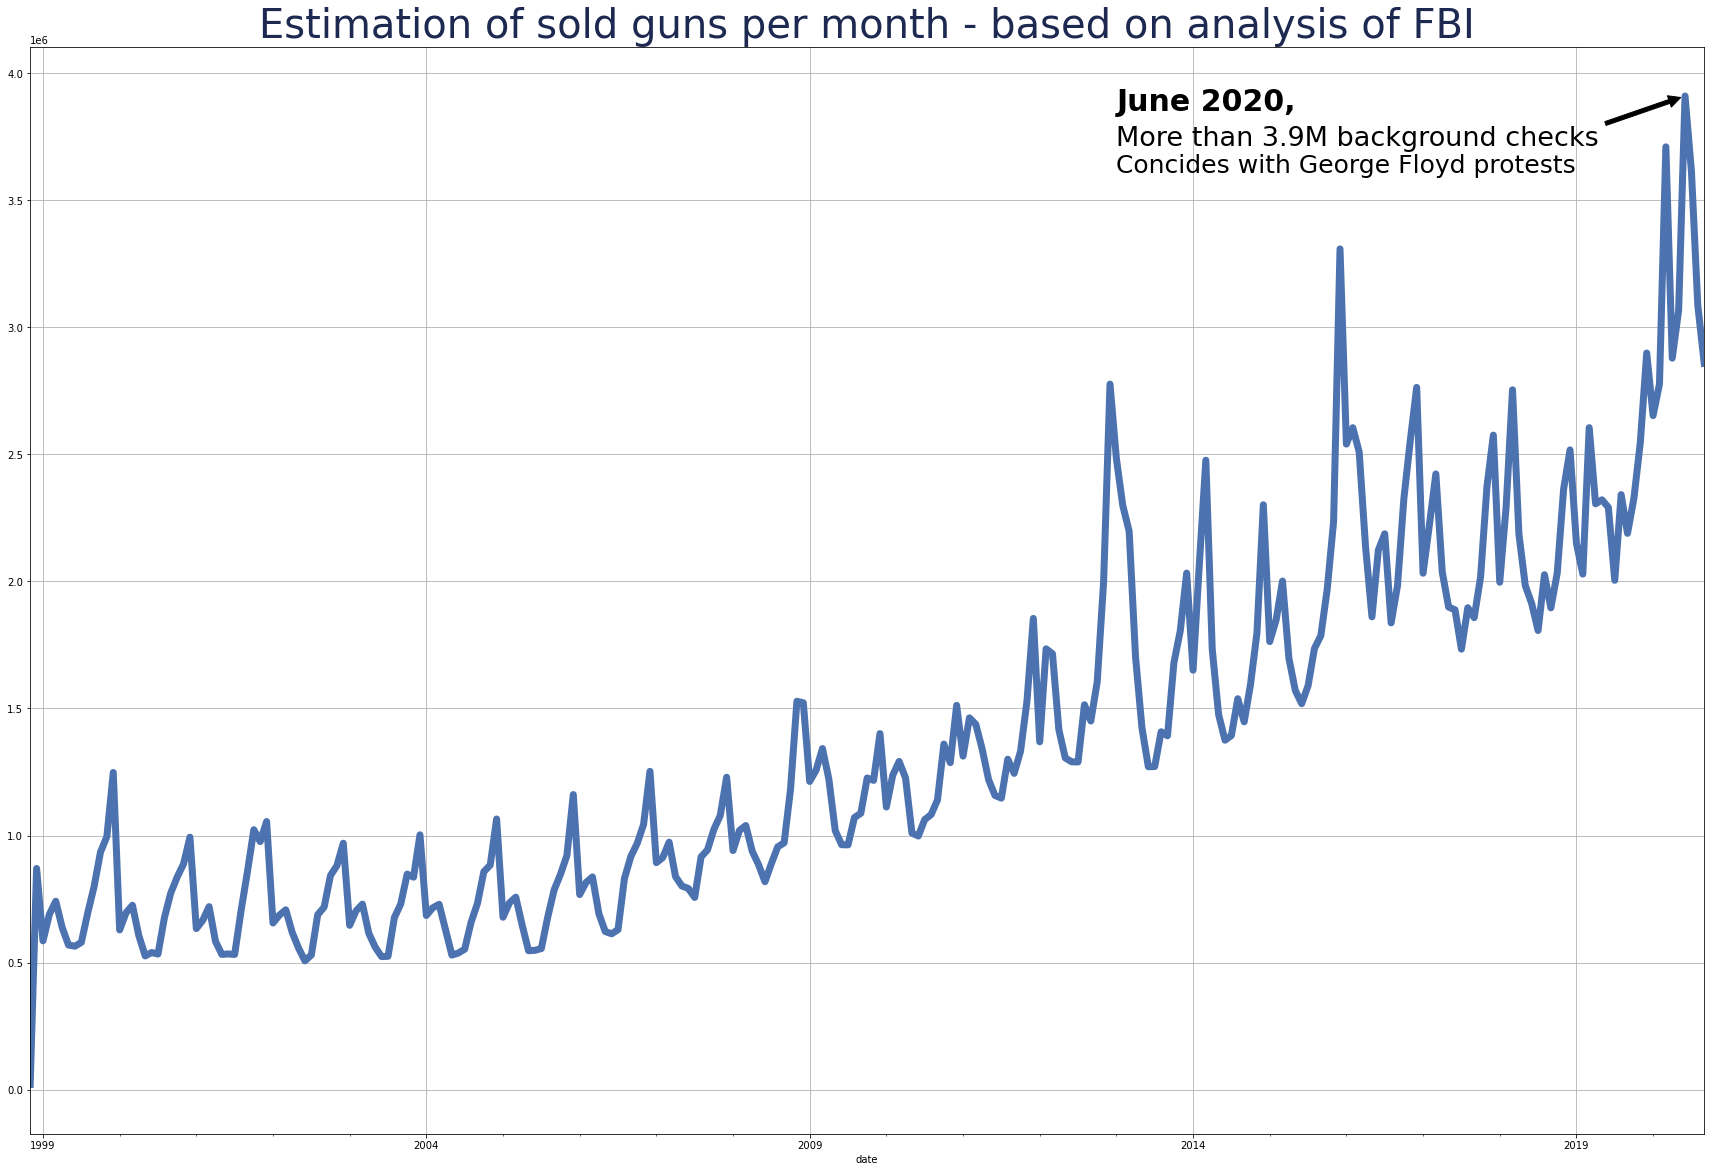

In [12]:
total_checks = df['totals'].resample('1M').sum() 
# don't really know why without using resample I get discrete plot,
# although for the rest of the analysis it works fine :)

ymax = max(total_checks)
xmax = total_checks.idxmax()

ax = total_checks.plot(kind='line', grid=True, figsize=(30,20), linewidth=7)

ax.annotate("June 2020,",
             weight = 'bold',
             xy=(xmax, ymax),
             # xytext=(xmax, ymax+50),
             xytext=(pd.to_datetime('2013'), ymax-ymax/70),
#              arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=30 )

ax.annotate("More than 3.9M background checks",
             xy=(xmax, ymax),
             # xytext=(xmax, ymax+50),
             xytext=(pd.to_datetime('2013'), ymax-ymax/20),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=27 )

ax.annotate("Concides with George Floyd protests",
             xy=(xmax, ymax),
             # xytext=(xmax, ymax+50),
             xytext=(pd.to_datetime('2013'), ymax-ymax/13),
#              arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=25, )

title_obj = plt.title('Estimation of sold guns per month - based on analysis of FBI', fontsize=40)
plt.setp(title_obj, color='#1D2951')

<p style="font-size:17px">
We see that the background-checks increases to reach a peak value at certain times, <br/>
This happens as most of the time people tend to react and take action to the surrounding events.<br/> 
So, for example the highest background-checks which had a world breaking record with more than <b>3.9M</b> background-checks happend the <b>last June</b>.<br/>
This concides with the George Floyd murder by a police officer and the protests that went voilent as a respond to the Police.<br/>
</p>

In [13]:
print('Highest Number of background checks: {}{}{}'.format(Color.BOLD, df.groupby('date')['totals'].sum().max(), Color.END))
print('Highest background checks Date: {}{}{}'.format(Color.BOLD, df.groupby('date')['totals'].sum().idxmax(), Color.END))

Highest Number of background checks: 3909502
Highest background checks Date: 2020-06-01 00:00:00


<p id='2' style="font-size:20px ; color:#1D2951"> <b>2. Investigate the overall background checks from 1998 to 2020 <br/>
    and point to some interesting events that lead to peak purchases of the firearms </b>
</p>

<p style="font-size:17px">
We can also see which states that corresponded strongly according to the events that happend by requesting firearms   
</p>

[None, None]

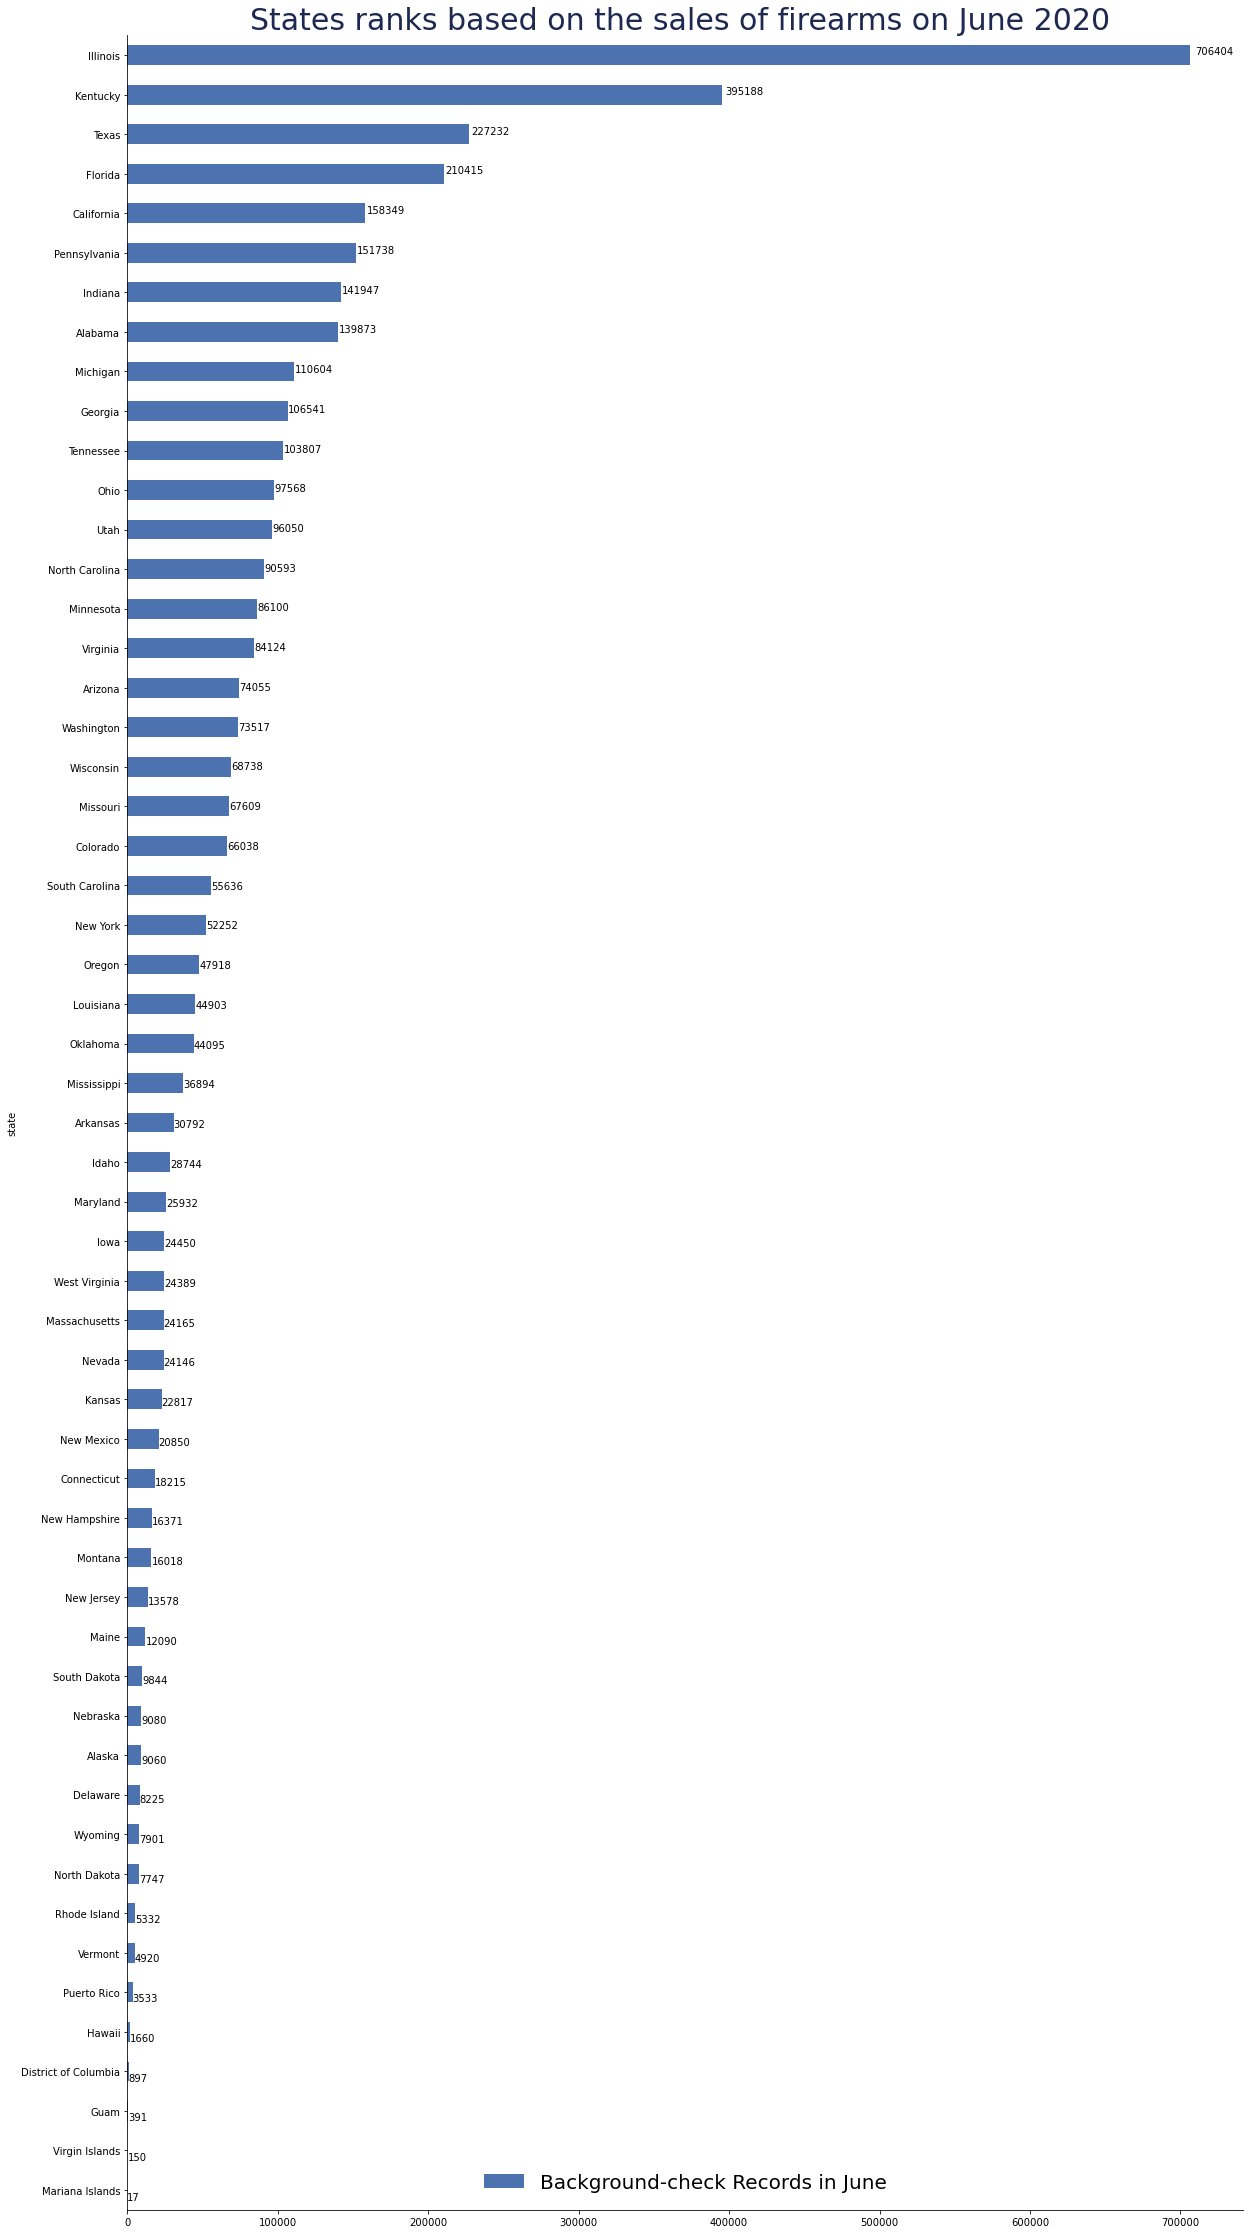

In [14]:
df_20_06 = df[df.index == '2020-06'] 
ax = df_20_06.groupby('state')['totals'].sum().sort_values().plot(kind='barh', figsize=(20,40))

for p in ax.patches:    
    ax.annotate(str(p.get_width()), ( p.get_width() * 1.005, p.get_y() * 1.005))
    
legend = ax.legend(['Background-check Records in June'],
                   loc='lower center',
                   frameon=False,
                   fontsize=20)
legend.get_frame().set_facecolor('#F7F9F9')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

title_obj = plt.title('States ranks based on the sales of firearms on June 2020 ', fontsize=30)
plt.setp(title_obj, color='#1D2951')

<p style="font-size:17px">
This points to some good results, as we know Chicago, which is a city if Illinois, had its deadlist day in at least 30 years with 18 killings within a 24-hour period on 31 May.<br/>
</p>

> https://www.bbc.com/news/world-us-canada-52984535

<p style="font-size:17px">
    which lead to this high number of weapons purchased
</p>

<p style="font-size:17px">
If we investigated the first plot more, we'll find the second maximum background-check with <b>more than 3.7M</b> firearm background checks at <b>March this year</b>. This coincides with the coronavirus epidemic. <br />
Apparently Coronavirus has prompted Americans to hurry in storing additional supplies in anticipation of any upcoming events and the guns seemed to be essential there!
</p>


<p style="font-size:17px">
If we excluded this year as for its special events and have a look for the past decades from 1999 to 2019, we will see another period of interest that happend before this year with a very high background checks<br/>
</p>

In [15]:
df_before_20 = df[df.index < '2020']
print('Highest background checks until 2020: {}{}{}'.format(Color.BOLD, df_before_20['handgun'].idxmax(), Color.END))

Highest background checks until 2020: 2015-12-01 00:00:00


<p style="font-size:17px">
<b>December 2015</b>, saw the highest background checks from 1999 to 2019<br/>
This too has a correlation with a deadly period as there was mass shooting that resulted in 14 killed people. <br/>
And due to this event and the afterward continuous call for gun-buying restrictions and the fear of these restrictions,<br/> this lead to the highest sold-gun peak up to 2019 <br/>
</p>

<p id='3' style="font-size:20px ; color:#1D2951"> <b>3. Which state has the most background-check records? </b> </p>

[None, None]

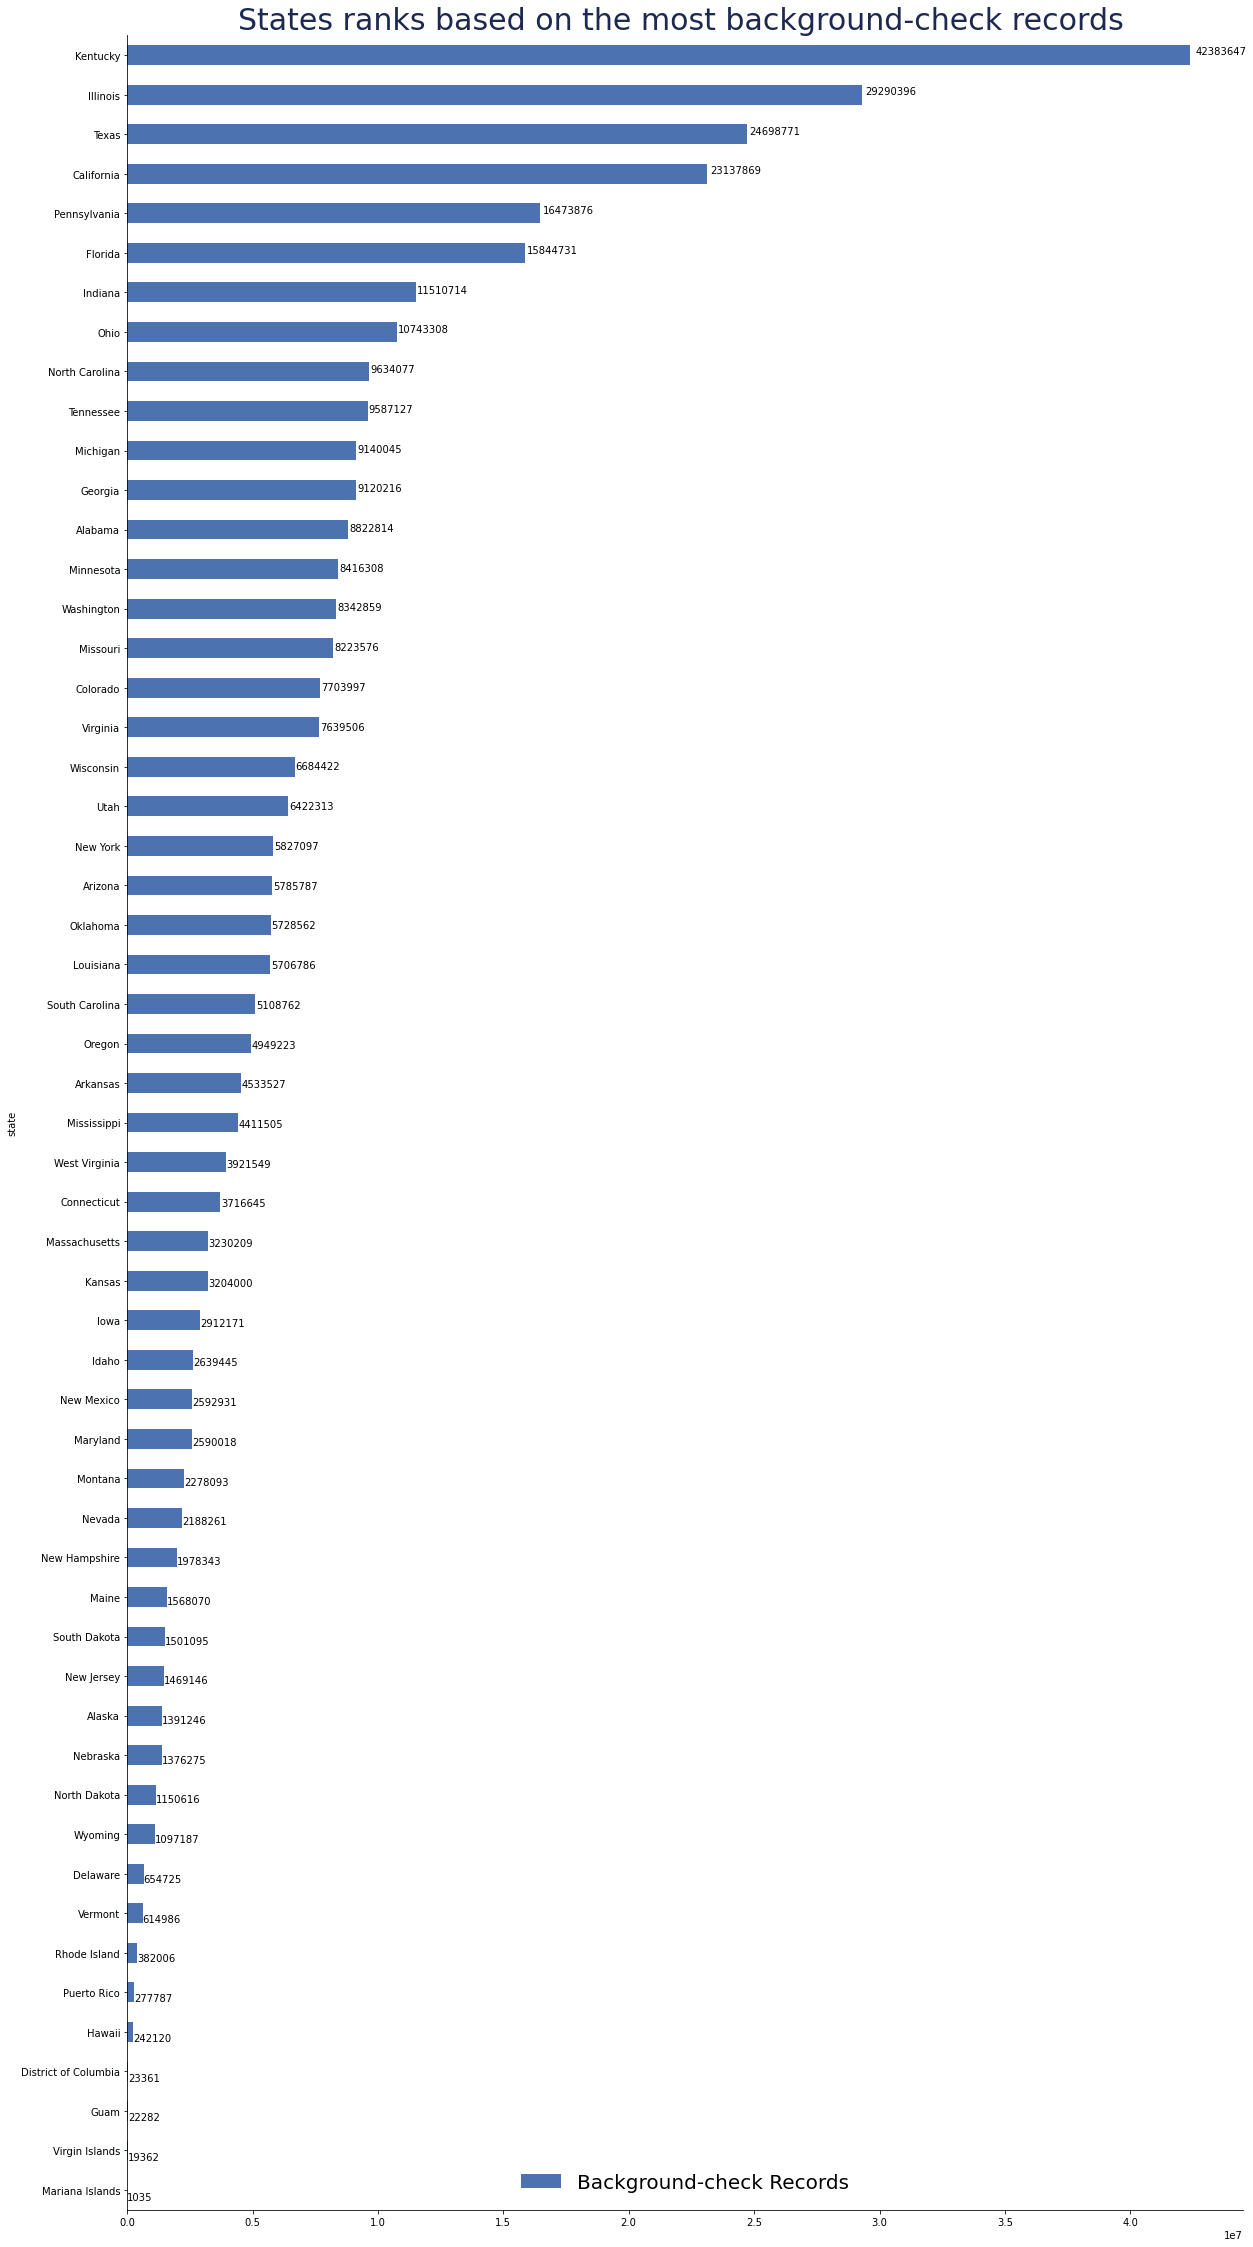

In [16]:
ax = df.groupby('state')['totals'].sum().sort_values().plot(kind='barh', figsize=(20,40))

for p in ax.patches:    
    ax.annotate(str(p.get_width()), ( p.get_width() * 1.005, p.get_y() * 1.005))
    
legend = ax.legend(['Background-check Records'],
                   loc='lower center',
                   frameon=False,
                   fontsize=20)
legend.get_frame().set_facecolor('#F7F9F9')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

title_obj = plt.title('States ranks based on the most background-check records ', fontsize=30)
plt.setp(title_obj, color='#1D2951')

<p style="font-size:17px">
We see that <b>Kentucky</b> has the most accumlative background-check records. <br />
Actually, Kentucky runs a new check on each concealed carry license holder each month that may give insights why they have the most background-check records. But we <b>CANNOT</b> be sure with this only feature. <br/>
<br/>
The availabilty and abundance of the guns across the state leads to some saturation level for selling-gun-business growth.<br/>
</p>

<p id='4' style="font-size:20px ; color:#1D2951"> <b>4. Which state with the most growth background check records?<b/> </pm

<p style="font-size:17px">
To visualize the growth in a better way, we'll choose the top 5 highest background checks
</p>

In [17]:
top_states = df.groupby('state')['totals'].sum().sort_values(ascending=False).head(5)
top_states = list(top_states.index)
top_states.sort()
top_states

['California', 'Illinois', 'Kentucky', 'Pennsylvania', 'Texas']

In [18]:
df_top_states = df[df['state'].isin(top_states)]
df_top_states.sort_values('state', inplace=True) # to ensure correct mapping to legend

<ipython-input-18-117fc71c6982>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_states.sort_values('state', inplace=True) # to ensure correct mapping to legend


In [19]:
df_top_states.groupby('state')['totals'].sum() # sorted

state
California      23137869
Illinois        29290396
Kentucky        42383647
Pennsylvania    16473876
Texas           24698771
Name: totals, dtype: int64

[None, None]

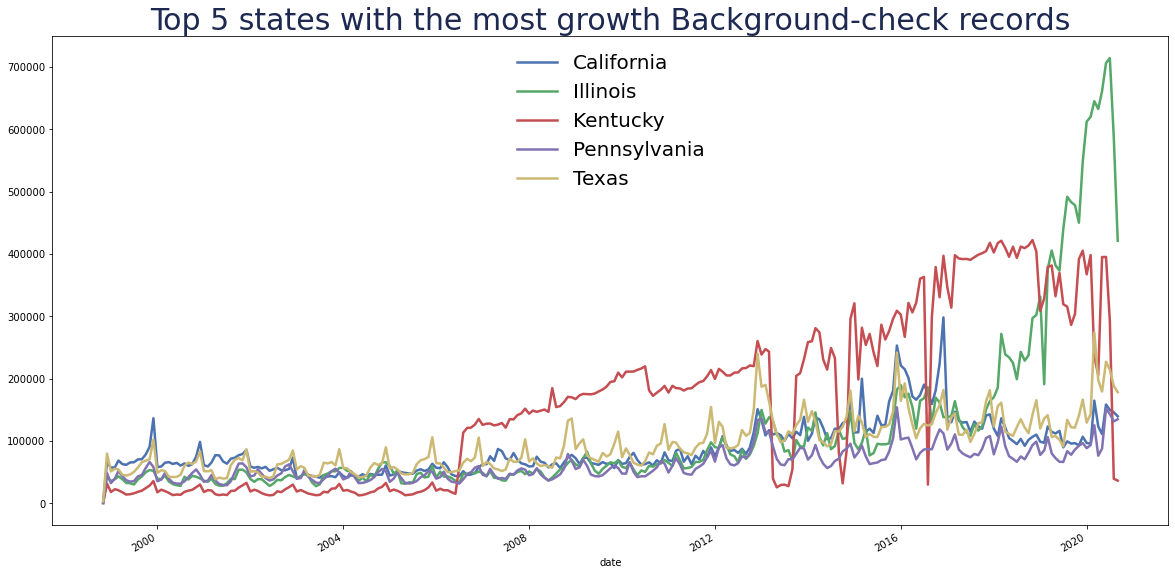

In [20]:
fig = plt.figure()
ax = df_top_states.groupby('state')['totals'].plot(figsize=(20,10), linewidth=2.5)
legend = plt.legend(top_states,
                   loc='upper center',
                   frameon=False,
                   fontsize=20)
legend.get_frame().set_facecolor('#F7F9F9')

title_obj = plt.title('Top 5 states with the most growth Background-check records', fontsize=30)
# plt.getp(title_obj)                    #print out the properties of title
# plt.getp(title_obj, 'text')            #print out the 'text' property for title
plt.setp(title_obj, color='#1D2951')         #set the color of title to red
# plt.title('Top 5 states with the most growth Background-check records',
#           fontdict={'fontweight': 'bold'}, fontsize=25)

<p style="font-size:17px">
This graph confirms that Illinois is having its highest growth for firegun-purchases to reach a new world-breaking-record on June-2020, the main reason for this growth seems to be due to the protests happend after the death of George Floyd but we cannot say that without checking all other factors. 
</p>

<p id='5' style="font-size:20px ; color:#1D2951"> <b>5. What is the relation between the handguns and the long-guns(Rifles and shotguns)?<b/> </pm

<p style="font-size:17px">
We will consider just the yellow part in the documentation which indicates— background checks initiated by an officially-licensed Federal Firearms Licensee (FFL) or criminal justice/law enforcement agency prior to the issuance of a firearm-related permit or transfer
</p>

> Check the PDF resource for additional info https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view

[None, None]

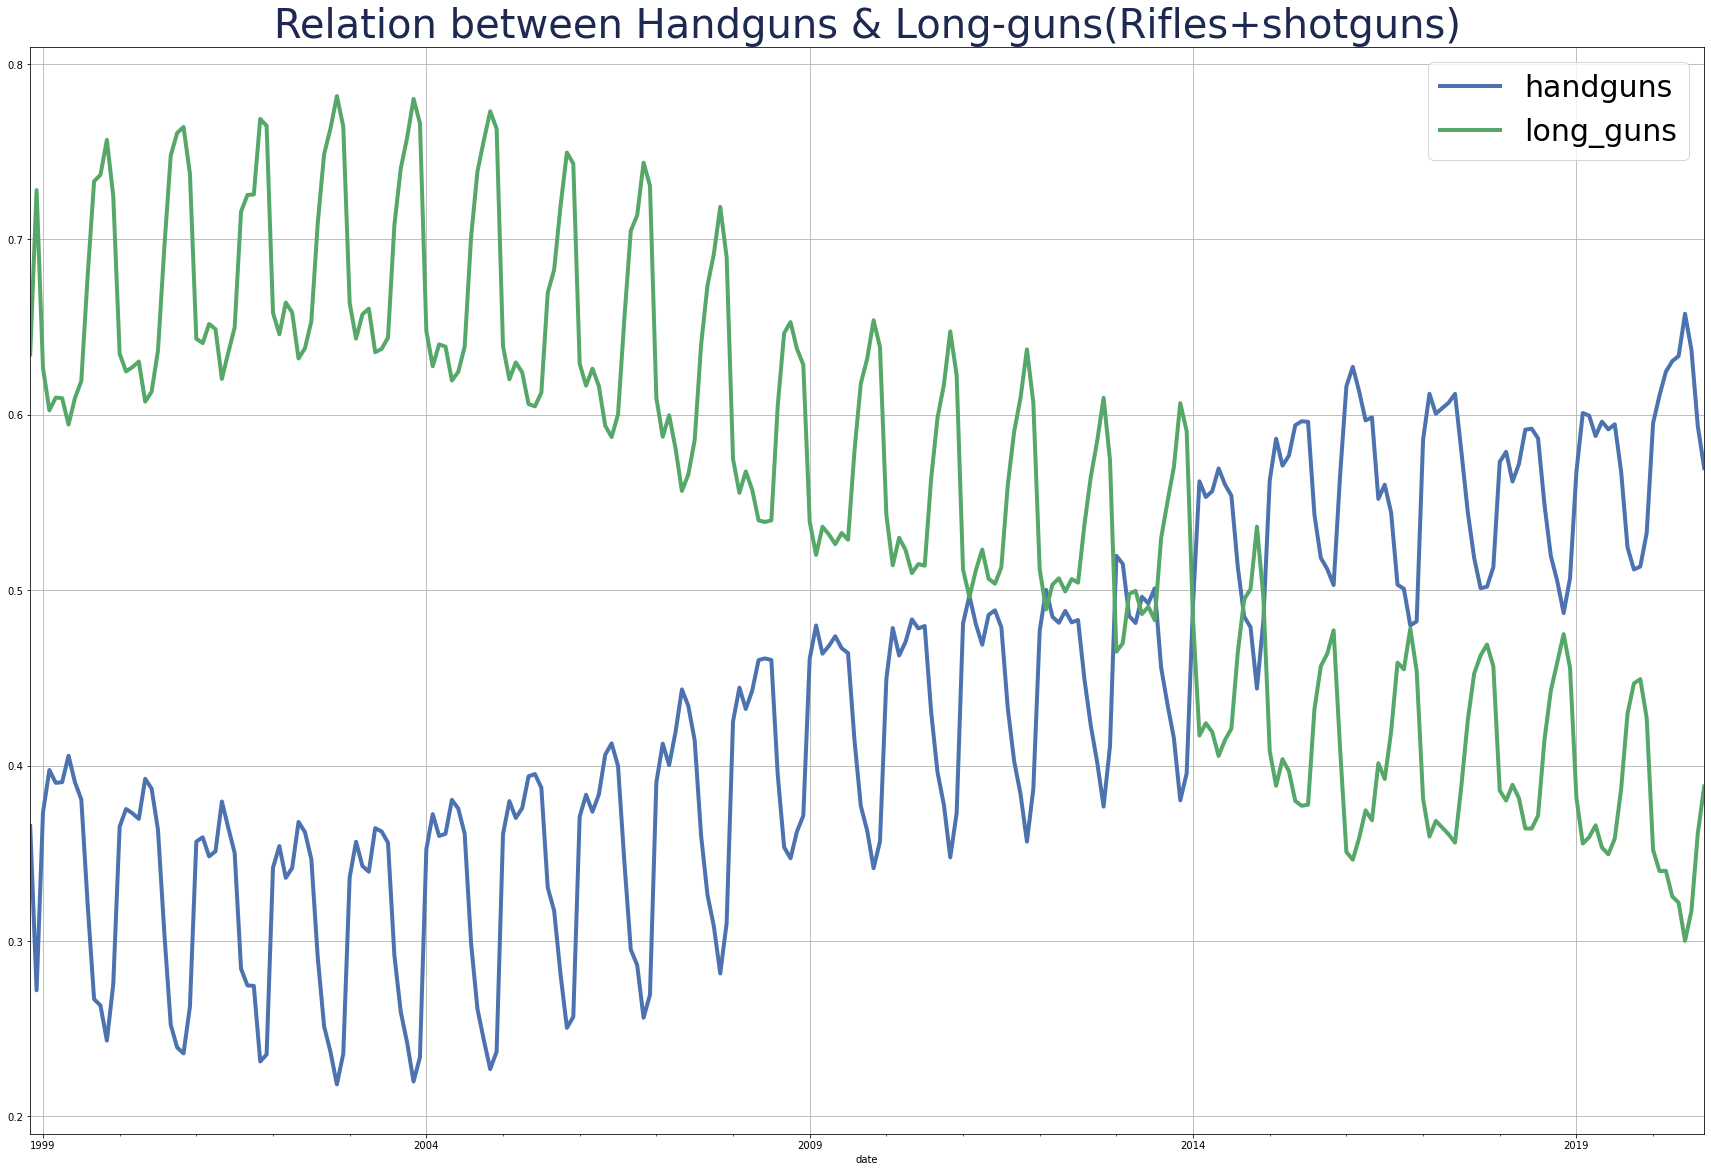

In [21]:
hand_gun_max = df.groupby('date')['handgun'].mean()
long_gun_max = df.groupby('date')['long_gun'].mean()
other_max = df.groupby('date')['other'].mean()

total_gun_max = hand_gun_max + long_gun_max + other_max

hand_gun_pct = hand_gun_max / total_gun_max
long_gun_pct = long_gun_max / total_gun_max

hand_gun_pct.plot(kind='line', grid=True, figsize=(30,20), linewidth=4)
long_gun_pct.plot(kind='line', grid=True, figsize=(30,20), linewidth=4)

plt.legend(['handguns', 'long_guns'], fontsize=30)

title_obj = plt.title('Relation between Handguns & Long-guns(Rifles+shotguns)', fontsize=40)
plt.setp(title_obj, color='#1D2951')         #set the color of title to red

<p style="font-size:17px">
This is quite interesting and needs more investigations!<br />
On 2014, Something MUST HAVE happend that lead to the restriction on long-guns!<br />
We can have some insights looking to this special bew license:<br/>
</p>

> Effective April 1, 2014, per CGS Sec. 29-37a(c), no person may purchase or receive any long gun unless such person holds a valid long gun eligibility certificate issued pursuant to section 29-37p<br/>
https://portal.ct.gov/DESPP/Division-of-State-Police/Special-Licensing-and-Firearms/Firearms

<hr>
<br/>
<a id='conclusions' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Conclusions</b></a>

<p style="font-size:17px">
<b>• Summary—</b>We investigated the behavior of the background-checks for each month in the past two decades, and saw that the firearms sales is strongly correlated with the events happening in this time. And another catching behavior is that whenever the calls goes up for new gun restrictions, sales go way up. And lastely we saw that the long-gun purchases decreases overtime while the handgun increases and this could be due the new licenses established for the long-guns, but with the data we have we can not be sure.
</p> 

<p style="font-size:17px">
<b>• Data limitations—</b> There could be more investigations on the data if there was a column with the main event took place each month, this way it will be much easier to give insights on the circumstances about the number of purchases.<br/>
I had to google the main events occured in the months I was interested in to see the correlations between events and gun sales.
with the provided data you can only see statistics about which states with the most background-checks and these similar simple statistics but surely you won't be able to answer the questions like why sales goes up in some months or why handguns and long-guns have this inverse proportional relation.<br/>
But fortunetely there were many online resources that could backup these questions with many other analysis they did so I had to use them to have a meaningful graphs.<br/>
There was also alot of missing values in most of the columns, but for our analysis we didn't need them anyway.
</p>
